In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
df = pd.read_csv('./dataset/meteorite-landings.csv')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [3]:
df = df.dropna(subset=['reclong','reclat'])
df = df[df.reclong < 300]

# 2d histogram

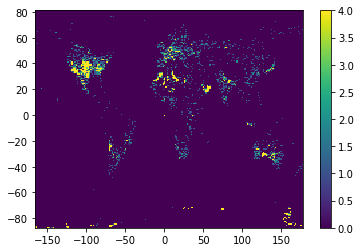

In [6]:
plt.hist2d(df.reclong,df.reclat, bins=200, vmax=4)
plt.colorbar()

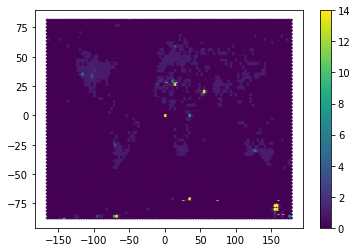

In [8]:
plt.hexbin(df.reclong,df.reclat, bins=200, vmax=4)
plt.colorbar()

<AxesSubplot:xlabel='reclong', ylabel='reclat'>

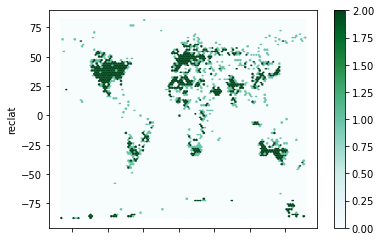

In [10]:
df.plot.hexbin(x='reclong', y= 'reclat', vmax=2, gridsize=100, linewidth=0.25)


# Contour

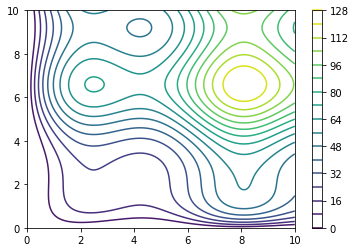

In [11]:
spacing = np.linspace(0,10,200)
X,Y = np.meshgrid(spacing, spacing)
Z = (np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X * Y))**2
plt.contour(X,Y,Z, levels=20)
plt.colorbar()

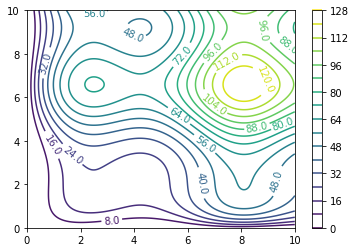

In [12]:
c = plt.contour(X,Y,Z,levels=20)
plt.clabel(c, inline=True, fmt='%0.1f')
plt.colorbar()

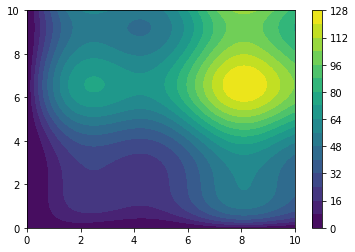

In [14]:
c = plt.contourf(X,Y,Z,levels=20)
plt.colorbar()

<a list of 9 text.Text objects>

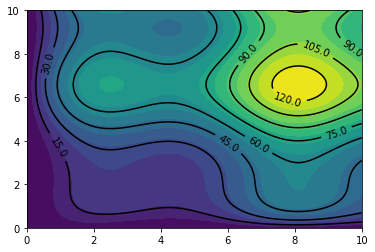

In [15]:
plt.contourf(X,Y,Z,levels=20)
c = plt.contour(X,Y,Z,levels=10,colors='black')
plt.clabel(c, inline=True, fmt='%0.1f')

# KDE

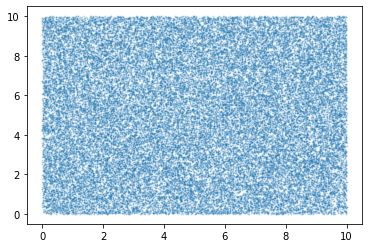

In [18]:
n = 50000
xs, ys = np.random.uniform(0,10,n), np.random.uniform(0,10,n)
zs = (np.sin(xs) + np.cos(ys) + 2 * np.arcsinh(xs * ys))**2
zs = zs.max()
passed = np.random.uniform(0,1,n) < zs
xs,ys = xs[passed], ys[passed]
plt.scatter(xs,ys,s=1,alpha=0.2)

C:\Users\muhammad.tayyab01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

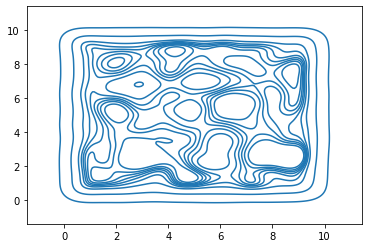

In [19]:
sb.kdeplot(xs,ys)

C:\Users\muhammad.tayyab01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muhammad.tayyab01\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

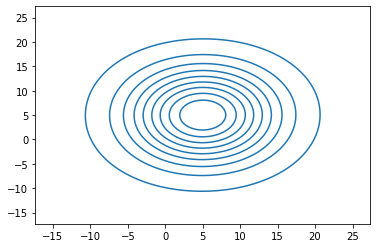

In [20]:
sb.kdeplot(xs,ys,bw=2.0)

# JointPlot

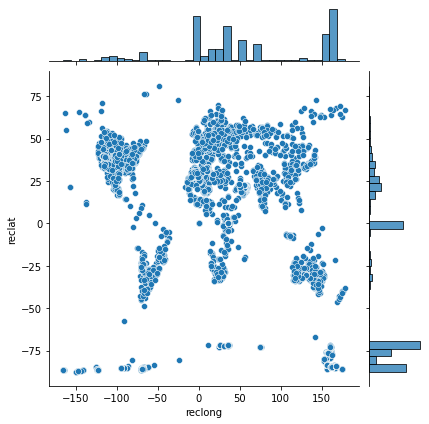

In [21]:
sb.jointplot(data=df, x='reclong', y='reclat')

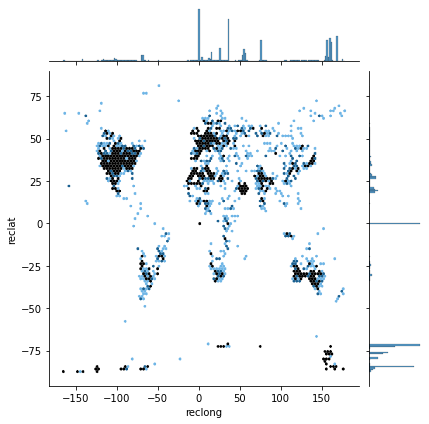

In [23]:
sb.jointplot(data=df, x='reclong', y='reclat', kind='hex',
            gridsize=100, vmax=3, linewidth=0, marginal_kws={'bins':200})

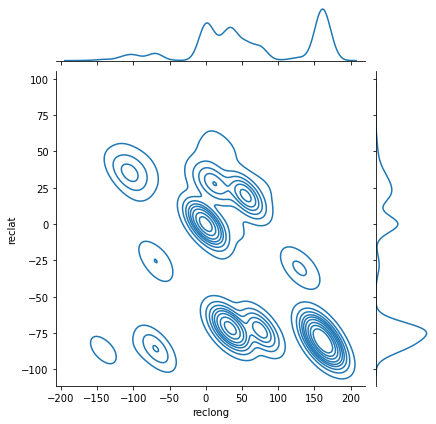

In [24]:
sb.jointplot(data=df, x='reclong', y='reclat', kind='kde')